# Training a convolutional neural network for classification based on spherical coordinates pixel projections

## Setup and Preparation for Training

Installation of required libraries

In [1]:
!pip install -q lightning torchmetrics tbparse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.2/812.2 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 72.2 MB/s eta 0:00:00


Importing libraries and modules

In [2]:
import zipfile
import os
import random
import numpy as np

import torch
from torchvision import datasets, transforms

import lightning as L

Setting seed for reproducibility

In [3]:
np.random.seed(42)
random.seed(42)
L.seed_everything(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


Detecting and setting device

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


Clone repository, import modules

In [5]:
!git clone https://github.com/dmitkovskiy/Classification-of-Amphiphilic-Homopolymers-Structures.git

import sys
sys.path.append('/content/Classification-of-Amphiphilic-Homopolymers-Structures/scripts')
import prepare_data_functions as prd
import my_train_functions as mtf
import my_models_functions as mmf

Cloning into 'Classification-of-Amphiphilic-Homopolymers-Structures'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 131 (delta 66), reused 27 (delta 0), pack-reused 0
Receiving objects: 100% (131/131), 31.72 MiB | 11.25 MiB/s, done.
Resolving deltas: 100% (66/66), done.


## Preparation of a dataset for model training, validation and training

Unzip data

In [6]:
%cd Classification-of-Amphiphilic-Homopolymers-Structures
with zipfile.ZipFile('data/rough_elements.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

/content/Classification-of-Amphiphilic-Homopolymers-Structures


Based on 3D point clouds of elements, preparation their 2D pixel spherical projections in *φ-θ* coordinates

In [7]:
main_folder = 'data/phi_theta_dataset'
prd.create_folders(main_folder)
prd.create_phi_theta_dataset('data/rough_elements', 'data/phi_theta_dataset')

Sequential horizontal movement of 1/10 of an image from the left to the right side 10 times

In [8]:
train_path = os.path.join(main_folder, 'train')
val_path = os.path.join(main_folder, 'val')
test_path = os.path.join(main_folder, 'test')

for path in [train_path, val_path, test_path]:
    prd.copy_images(path)

Loading an image dataset with transformations

In [9]:
train_set = prd.load_dataset(train_path)
val_set = prd.load_dataset(val_path)
test_set = prd.load_dataset(test_path)

Demonstration of pixel spherical projections for typical elements

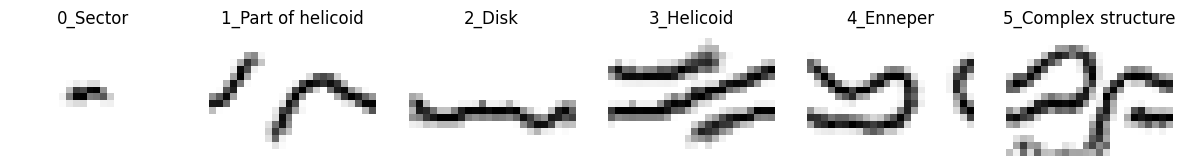

In [10]:
prd.show_one_example_per_label(test_set)

Setting up Data Loaders with Batch Size and Workers

In [22]:
BATCH_SIZE = 240
NUM_WORKERS = 2

train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False, num_workers=NUM_WORKERS)

## Init and train model

Model initialization, training setup, and metrics plotting

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | CNN_Net            | 216 K  | train
1 | train_acc | MulticlassAccuracy | 0      | train
2 | valid_acc | MulticlassAccuracy | 0      | train
3 | test_acc  | MulticlassAccuracy | 0      | train
4 | criterion | CrossEntropyLoss   | 0      | train
---------------------------------------------------------
216 K     Trainable params
0         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


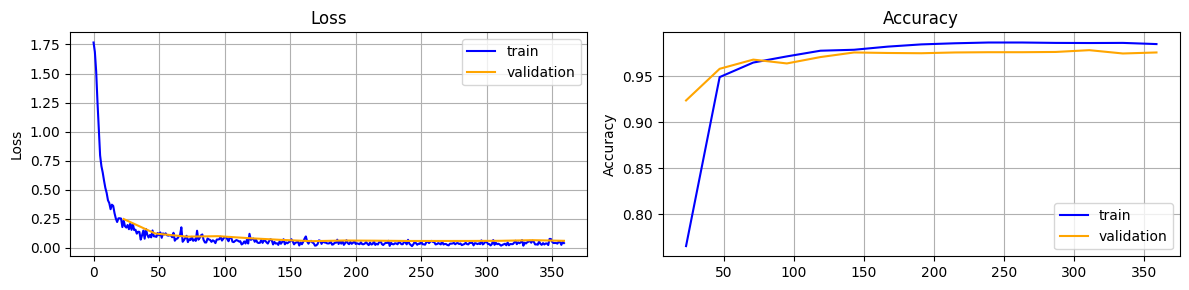

In [25]:
model = mmf.CNN_Net(image_height=18, image_width=24).to(device)
lit_model = mtf.Lit(model, optimizer_type = 'Adam')
log_dir = "/content/Classification-of-Amphiphilic-Homopolymers-Structures/lightning_logs"
os.makedirs(log_dir, exist_ok=True)
trainer = L.Trainer(max_epochs=15, log_every_n_steps=5)
trainer.fit(model=lit_model, train_dataloaders=train_loader, val_dataloaders=val_loader)
mtf.plot_training_metrics(trainer)

Loading Best Model and Testing
The path to the best model is stored in the folder ./lightning_logs/version_0/checkpoints

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_acc_epoch       │    0.9747222065925598     │
│         test_loss         │    0.07289371639490128    │
└───────────────────────────┴───────────────────────────┘

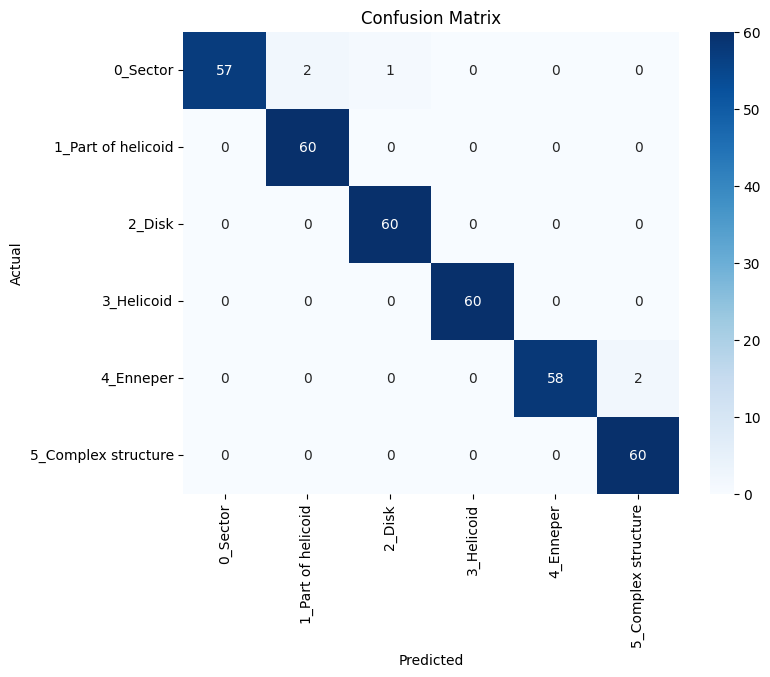

In [26]:
model_best = mmf.CNN_Net(image_height=18, image_width=24).to(device)
checkpoint_path = checkpoint_path = "/content/Classification-of-Amphiphilic-Homopolymers-Structures/lightning_logs/version_0/checkpoints/epoch=14-step=1440.ckpt"
checkpoint = torch.load(checkpoint_path)

new_state_dict = {k.replace('model.', ''): v for k, v in checkpoint['state_dict'].items()}
model_best.load_state_dict(new_state_dict)
lit_model_best = mtf.Lit(model_best)
trainer.test(model=lit_model_best, dataloaders=test_loader)

mtf.plot_confusion_matrix(model_best, test_loader, test_set, n_shift=10)

Save best model

In [ ]:
torch.save(model_best.state_dict(), 'model_phi_theta.pth')